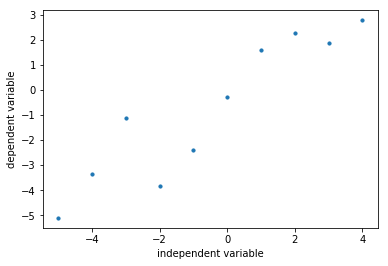

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5, 5, 1)
y = x + np.random.uniform(-2, 2, len(x))
plt.scatter(x, y, s=10)
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.show()


In [3]:
def mean(x):
    return sum(x) / len(x)

def variance(x):
    x_bar = mean(x)
    return sum((x_i - x_bar) ** 2 for x_i in x) / len(x)

def covariance(x, y):
    x_bar = mean(x)
    y_bar = mean(y)
    return sum((x_i - x_bar) * (y_i - y_bar) for x_i, y_i in zip(x, y)) / len(x)


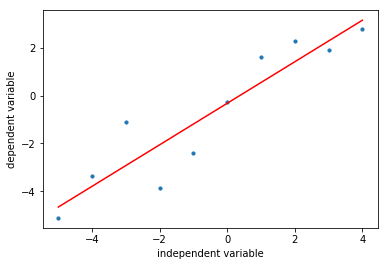

In [4]:
#simple-linear-regression
beta = covariance(x, y) / variance(x)
alpha = mean(y) - beta * mean(x)

predict = beta * x + alpha

plt.scatter(x, y, s=10)
plt.plot(x, predict, c='r')
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.show()


In [5]:
#multiple-linear-regression
X = np.zeros((len(x), 10))
X[:, 0] = x
X[:, 1] = x ** 2
X[:, 2] = x ** 3
X[:, 3] = x ** 4
X[:, 4] = x ** 5
X[:, 5] = x ** 6
X[:, 6] = x ** 7
X[:, 7] = x ** 8
X[:, 8] = x ** 9
X[:, 9] = 1

beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)


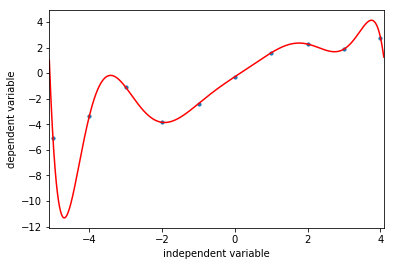

In [9]:
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def predict(beta, X_i):
    return dot(beta, X_i)

x2 = np.arange(-5.1, 4.1, 0.01)
predict_seq = [predict(beta, [x2_i, x2_i ** 2, x2_i ** 3, x2_i ** 4, x2_i ** 5,
                              x2_i ** 6, x2_i ** 7, x2_i ** 8, x2_i ** 9, 1]) for x2_i in x2]

plt.scatter(x, y, s=10)
plt.plot(x2, predict_seq, c='r')
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.xlim(-5.1, 4.1)
plt.show()


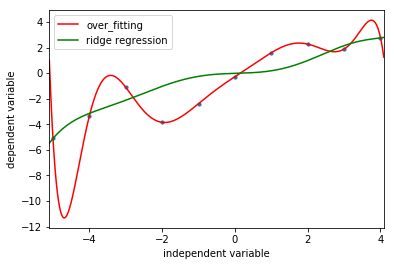

In [12]:
penalty_param = 100
beta_2 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + penalty_param * np.eye(10)), X.T), y)

predict_seq2 = [predict(beta_2, [x2_i, x2_i ** 2, x2_i ** 3, x2_i ** 4, x2_i ** 5,
                                x2_i ** 6, x2_i ** 7, x2_i ** 8, x2_i ** 9, 1]) for x2_i in x2]

plt.scatter(x, y, s=10)
plt.plot(x2, predict_seq, c='r', label='over_fitting')
plt.plot(x2, predict_seq2, c='g', label='ridge regression')
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.xlim(-5.1, 4.1)
plt.legend()
plt.show()
